In [34]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
matplotlib.rcParams.update({'font.size': 22})
plt.rc('figure', figsize=(11,6))

mtd1=[]
with open('./graphene_test/output/cntabf.pmf') as pmfs1:
    for line in pmfs1:
        if line[0] == '#':
            mtds1=[]
        elif line != '\n':
            mtd1.append(list(map(float, line.split())))
            fixed_mtd_1=np.array(mtd1)

def bulkAnal(input_mtt, input_potential, input_temp):
    bulkAnalytic = []
    for i in range(len(eta)):
        bulkAnalytic.append(np.exp((input_potential + input_mtt[i] + np.log(eta[-1]))/(k*input_temp)))  
    return bulkAnalytic

def bulkPMF(input_pmf, input_potential, input_temp):
    bulkPMF = []
    for i in range(len(input_pmf)):
        bulkPMF.append(np.exp((input_potential + input_pmf[i]+np.log(eta[-1]))/(k*input_temp)))   
    return bulkPMF

dist = np.array(fixed_mtd_1[:,0])
dist = dist[1:]
pmf3 = np.array(fixed_mtd_1[:,1])
pmf3 = pmf3[1:]


radius = 0.09
gamm = 25/((dist*(51.05/2)*0.1 + radius)**2*np.pi) # number of atoms per effective area
area = math.pi*radius**2  # area of a single atom (soft sphere)
eta = np.array(gamm)*area # packing fraction

potential3 = -4.78
k = 0.001987
temp3 = 300
 
a3 = potential3/k/temp3  # first term in the exponential function to get bulk mole fraction at temperature 300

# Analytically calculate potential at a certain eta
func = []
for item in eta:
    func.append(np.log(item/(1-item)) + (3*item-2*item**2)/(1-item)**2)

#ref1 = k*temp1*np.log(eta[-1]) #### ref ~= func[-1]

atomPMF3 = np.array(pmf3)/25   # PMF from simulation at 300K
mtt3 = k*temp3*np.array(func) - k*temp3*func[-1]  # potential difference between a certain eta and reference eta at 300K
bulk_analytic3 = bulkAnal(mtt3, potential3, temp3)
bulk_pmf3 = bulkPMF(atomPMF3, potential3, temp3)



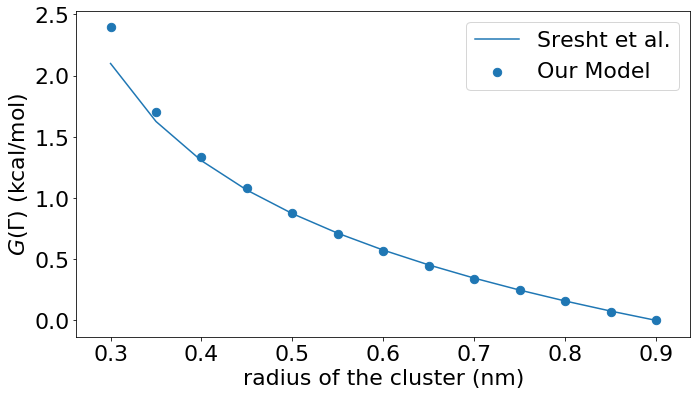

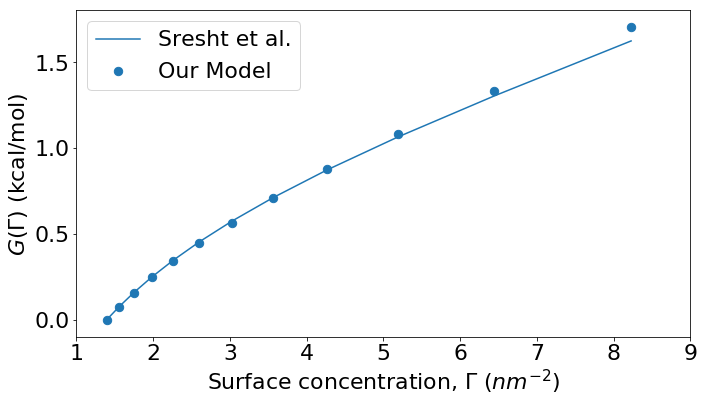

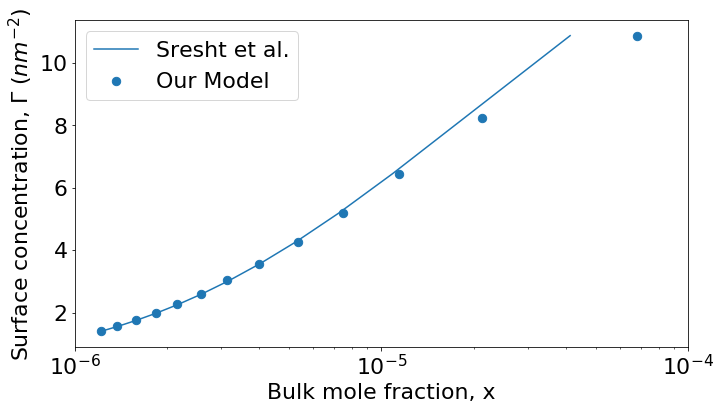

In [51]:
plt.scatter(dist[1:], atomPMF3[1:], label = 'Our Model', s= 70) #simulation
plt.plot(dist[1:], mtt3[1:], label = 'Sresht et al.')
plt.legend(loc='upper right')
plt.xlabel('radius of the cluster (nm)')
plt.ylabel(r'$G(\Gamma)$ (kcal/mol)')
plt.savefig('pmf')
plt.show()


plt.scatter(gamm[2:], atomPMF3[2:], label = 'Our Model',s=70) #simulation
plt.plot(gamm[2:], mtt3[2:], label = 'Sresht et al.')
plt.legend(loc='upper left')
plt.xlabel(r'Surface concentration, $\Gamma$ $(nm^{-2})$')
plt.ylabel(r'$G(\Gamma)$ (kcal/mol)')
plt.xlim(1,9)
plt.savefig('pmf vs gamma')
plt.show()

plt.scatter(bulk_pmf3[1:], gamm[1:], label = 'Our Model', s= 70)
plt.plot(bulk_analytic3[1:], gamm[1:], label = 'Sresht et al.')
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel(r'Surface concentration, $\Gamma$ $(nm^{-2})$')
plt.xlabel('Bulk mole fraction, x')
plt.xlim(10**-6,10**-4)
#lt.ylim(0,0.3)
plt.savefig('bulk vs gamma')
plt.show()